In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Setting up the working directory
import os

WORK_DIR = '/content/drive/MyDrive/WasAdvGAN/mnist'
os.chdir(WORK_DIR)
print(os.listdir('./'))

DATA_DIR = 'data'
os.makedirs(DATA_DIR, exist_ok=True)
print(os.listdir(DATA_DIR))

MODEL_DIR = 'saved_models'
os.makedirs(MODEL_DIR, exist_ok=True)
print(os.listdir(MODEL_DIR))

PLOT_DIR = 'plots'
os.makedirs(PLOT_DIR, exist_ok=True)
print(os.listdir(PLOT_DIR))

ADVGAN_DIR = 'advgan'
os.makedirs(ADVGAN_DIR, exist_ok=True)
print(os.listdir(ADVGAN_DIR))

ADV_DATA_DIR = 'data/advgan'
os.makedirs(ADV_DATA_DIR, exist_ok=True)
print(os.listdir(ADV_DATA_DIR))

['AdvGAN.ipynb', 'models.py', 'data', '__pycache__', 'saved_models', 'plots', 'advgan', 'wagan', 'advgan.py', 'pipeline.py', 'wasserstein.py', 'Experiments.ipynb', 'WAGAN.ipynb', 'wagan.py']
['MNIST', 'advgan', 'wagan']
['model_original.pth', 'config_original.json', 'model_advgan_original.pth', 'config_advgan_original.json']
['training_error_original.png']
['original']
['adv_test_images_original.pickle', 'test_labels_original.pickle', 'adv_train_images_original.pickle', 'train_labels_original.pickle']


In [6]:
from tqdm.notebook import tqdm
import itertools
import math
import json
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn
import torch
import numpy as np
import models
import torch.nn.functional as F
import torchvision
import torchvision.datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from pipeline import TargetModel_Pipeline
from advgan import AdvGAN_Attack

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

## AdvGAN adversarial attack

In [ ]:
config = dict()
config['name'] = 'original'
config['model_num_labels'] = 10
config['image_nc'] = 1
config['box_min'] = 0
config['box_max'] = 1
config['trained_model'] = MODEL_DIR + '/model_original.pth'
config['adv_loss_fnc'] = 'c&w'
config['adv_lambda'] = 10
config['pert_lambda'] = 1
config['weights'] = 'init'
config['trained_gen_model'] = None
config['trained_gen_model'] = None
config['initial_lr'] = 0.001
config['cutoff_epochs1'] = 50
config['cutoff_lr1'] = 0.0001
config['cutoff_epochs2'] = 80
config['cutoff_lr2'] = 0.00001
config['batch_size'] = 128
config['num_epochs'] = 60

In [ ]:
advGAN = AdvGAN_Attack(device, config)

In [ ]:
mnist_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=False)
dataloader = DataLoader(mnist_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=1)

In [ ]:
# training the genereator and discriminator of the AdvGAN model
loss_D_epoch, loss_G_fake_epoch, loss_adv_epoch, loss_perturb_epoch = advGAN.fit(dataloader, config['num_epochs'], ADVGAN_DIR)

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1:
 loss_D: 0.242,
 loss_G_fake: 0.498,
 loss_adv: 27.098,
 loss_perturb: 15.033, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2:
 loss_D: 0.029,
 loss_G_fake: 0.825,
 loss_adv: 7.574,
 loss_perturb: 16.621, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3:
 loss_D: 0.012,
 loss_G_fake: 0.894,
 loss_adv: 4.760,
 loss_perturb: 16.949, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4:
 loss_D: 0.005,
 loss_G_fake: 0.934,
 loss_adv: 3.240,
 loss_perturb: 16.841, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5:
 loss_D: 0.003,
 loss_G_fake: 0.947,
 loss_adv: 2.794,
 loss_perturb: 16.847, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 6:
 loss_D: 0.001,
 loss_G_fake: 0.968,
 loss_adv: 2.334,
 loss_perturb: 16.537, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 7:
 loss_D: 0.001,
 loss_G_fake: 0.973,
 loss_adv: 2.110,
 loss_perturb: 16.446, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 8:
 loss_D: 0.001,
 loss_G_fake: 0.972,
 loss_adv: 1.770,
 loss_perturb: 16.480, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 9:
 loss_D: 0.001,
 loss_G_fake: 0.972,
 loss_adv: 1.940,
 loss_perturb: 16.465, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 10:
 loss_D: 0.004,
 loss_G_fake: 0.964,
 loss_adv: 1.773,
 loss_perturb: 16.469, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 11:
 loss_D: 0.001,
 loss_G_fake: 0.979,
 loss_adv: 1.532,
 loss_perturb: 16.161, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 12:
 loss_D: 0.000,
 loss_G_fake: 0.987,
 loss_adv: 1.501,
 loss_perturb: 16.056, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 13:
 loss_D: 0.000,
 loss_G_fake: 0.989,
 loss_adv: 1.334,
 loss_perturb: 16.001, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 14:
 loss_D: 0.000,
 loss_G_fake: 0.992,
 loss_adv: 1.247,
 loss_perturb: 15.701, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 15:
 loss_D: 0.000,
 loss_G_fake: 0.986,
 loss_adv: 1.348,
 loss_perturb: 15.658, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 16:
 loss_D: 0.000,
 loss_G_fake: 0.989,
 loss_adv: 1.113,
 loss_perturb: 15.426, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 17:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 1.125,
 loss_perturb: 15.242, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 18:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 1.203,
 loss_perturb: 15.291, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 19:
 loss_D: 0.001,
 loss_G_fake: 0.987,
 loss_adv: 0.864,
 loss_perturb: 15.048, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 20:
 loss_D: 0.000,
 loss_G_fake: 0.993,
 loss_adv: 0.798,
 loss_perturb: 14.634, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 21:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 0.870,
 loss_perturb: 14.080, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 22:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 0.849,
 loss_perturb: 13.886, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 23:
 loss_D: 0.000,
 loss_G_fake: 0.993,
 loss_adv: 0.808,
 loss_perturb: 13.662, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 24:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 0.747,
 loss_perturb: 13.479, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 25:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.682,
 loss_perturb: 13.284, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 26:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.600,
 loss_perturb: 12.735, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 27:
 loss_D: 0.001,
 loss_G_fake: 0.988,
 loss_adv: 0.638,
 loss_perturb: 12.080, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 28:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 0.640,
 loss_perturb: 11.857, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 29:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.661,
 loss_perturb: 12.231, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 30:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 0.499,
 loss_perturb: 11.548, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 31:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 0.508,
 loss_perturb: 11.650, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 32:
 loss_D: 0.000,
 loss_G_fake: 0.992,
 loss_adv: 0.579,
 loss_perturb: 11.721, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 33:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.538,
 loss_perturb: 11.466, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 34:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.487,
 loss_perturb: 10.923, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 35:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.529,
 loss_perturb: 10.652, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 36:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.425,
 loss_perturb: 10.721, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 37:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.445,
 loss_perturb: 9.975, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 38:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.385,
 loss_perturb: 10.515, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 39:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.401,
 loss_perturb: 9.815, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 40:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 0.419,
 loss_perturb: 9.342, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 41:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.451,
 loss_perturb: 9.488, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 42:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.420,
 loss_perturb: 9.827, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 43:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.343,
 loss_perturb: 9.495, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 44:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.345,
 loss_perturb: 9.149, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 45:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.293,
 loss_perturb: 8.790, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 46:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.339,
 loss_perturb: 9.058, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 47:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.354,
 loss_perturb: 8.530, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 48:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.365,
 loss_perturb: 8.421, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 49:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.331,
 loss_perturb: 8.856, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 50:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.210,
 loss_perturb: 7.815, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 51:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.165,
 loss_perturb: 7.363, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 52:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.200,
 loss_perturb: 7.034, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 53:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.151,
 loss_perturb: 6.727, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 54:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.159,
 loss_perturb: 6.600, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 55:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.149,
 loss_perturb: 6.601, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 56:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.155,
 loss_perturb: 6.465, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 57:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.128,
 loss_perturb: 6.525, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 58:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.113,
 loss_perturb: 6.344, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 59:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.124,
 loss_perturb: 6.369, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 60:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.126,
 loss_perturb: 6.239, 



### New accuracues on adverserial training/testing images 

In [ ]:
# calculate accuracy on the adversarial dataset
# accuracy on the new adversarial training images
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

num_correct_orig, num_correct_adv = advGAN.calc_adverserial_acc(train_dataloader)
print(num_correct_orig, num_correct_adv, len(mnist_train_dataset))
print(num_correct_orig/len(mnist_train_dataset), num_correct_adv/len(mnist_train_dataset))

  0%|          | 0/469 [00:00<?, ?it/s]

59979 175 60000
0.99965 0.002916666666666667


In [ ]:
# calculate accuracy on the adversarial dataset
# accuracy on the new adversarial testing images
mnist_test_dataset = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=True)
test_dataloader = DataLoader(mnist_test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

num_correct_orig, num_correct_adv = advGAN.calc_adverserial_acc(test_dataloader)
print(num_correct_orig, num_correct_adv, len(mnist_test_dataset))
print(num_correct_orig/len(mnist_test_dataset), num_correct_adv/len(mnist_test_dataset))

  0%|          | 0/79 [00:00<?, ?it/s]

9930 48 10000
0.993 0.0048


### Store adverserial train and test images

In [ ]:
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

adv_images_list = []
real_labels_list = []

for images, labels in tqdm(dataloader):
  images, labels = images.to(advGAN.device), labels.to(advGAN.device)
  # Generate adverserial images
  adv_images = advGAN.generate_adverserial_images(images).to(advGAN.device)
  adv_images_list.append(adv_images)
  real_labels_list.append(labels)

adv_images = torch.cat(adv_images_list, dim=0)
real_labels = torch.cat(real_labels_list, dim=0)
print(adv_images.shape)
print(real_labels.shape)

with open(ADV_DATA_DIR + '/adv_train_images_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(adv_images, handle)

with open(ADV_DATA_DIR + '/train_labels_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(real_labels, handle)

  0%|          | 0/469 [00:00<?, ?it/s]

In [ ]:
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

adv_images_list = []
real_labels_list = []

for images, labels in tqdm(train_dataloader):
  images, labels = images.to(advGAN.device), labels.to(advGAN.device)
  # Generate adverserial images
  adv_images = advGAN.generate_adverserial_images(images).to(advGAN.device)
  adv_images_list.append(adv_images)
  real_labels_list.append(labels)

adv_images = torch.cat(adv_images_list, dim=0)
real_labels = torch.cat(real_labels_list, dim=0)
print(adv_images.shape)
print(real_labels.shape)

with open(ADV_DATA_DIR + '/adv_train_images_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(adv_images, handle)

with open(ADV_DATA_DIR + '/train_labels_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(real_labels, handle)

  0%|          | 0/469 [00:00<?, ?it/s]

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [ ]:
mnist_test_dataset = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=True)
test_dataloader = DataLoader(mnist_test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

adv_images_list = []
real_labels_list = []

for images, labels in tqdm(test_dataloader):
  images, labels = images.to(advGAN.device), labels.to(advGAN.device)
  # Generate adverserial images
  adv_images = advGAN.generate_adverserial_images(images).to(advGAN.device)
  adv_images_list.append(adv_images)
  real_labels_list.append(labels)

adv_images = torch.cat(adv_images_list, dim=0)
real_labels = torch.cat(real_labels_list, dim=0)
print(adv_images.shape)
print(real_labels.shape)

with open(ADV_DATA_DIR + '/adv_test_images_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(adv_images, handle)

with open(ADV_DATA_DIR + '/test_labels_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(real_labels, handle)

  0%|          | 0/79 [00:00<?, ?it/s]

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


### Examples of Adverserially created images

In [ ]:
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

images_ex = None
adverserial_images_ex = None

for images, labels in train_dataloader:
  images, labels = images.to(advGAN.device), labels.to(advGAN.device)
  # Generate adverserial images
  adv_images = advGAN.generate_adverserial_images(images).to(advGAN.device)
  images_ex = images.detach().clone()
  adverserial_images_ex = adv_images.detach().clone()
  print(images_ex.shape)
  print(adverserial_images_ex.shape)
  break

torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])


In [ ]:
index = 100
image = torch.squeeze(images_ex[index])
adversary = torch.squeeze(adverserial_images_ex[index])
print(image.shape, adversary.shape)
# Lp distance between the two images
Lp_distance = (image - adversary).pow(2).sum().item()
print(math.sqrt(Lp_distance))

torch.Size([28, 28]) torch.Size([28, 28])
3.9344100938463518


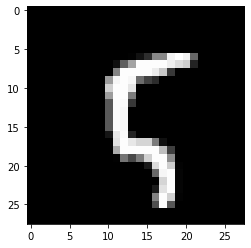

In [ ]:
plt.imshow(image.cpu().numpy().squeeze(), cmap='gray')
plt.show()

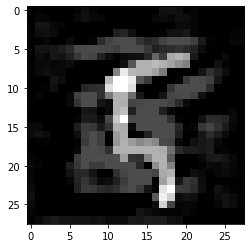

In [ ]:
plt.imshow(adversary.cpu().numpy().squeeze(), cmap='gray')
plt.show()